<a href="https://colab.research.google.com/github/adilenevegaa/proyecto-final/blob/main/proyectobd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Datos cargados correctamente.


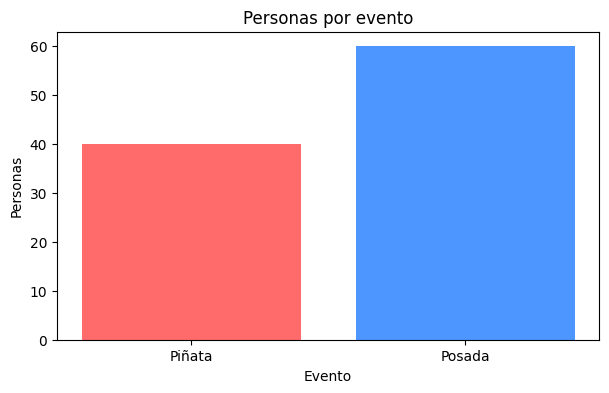

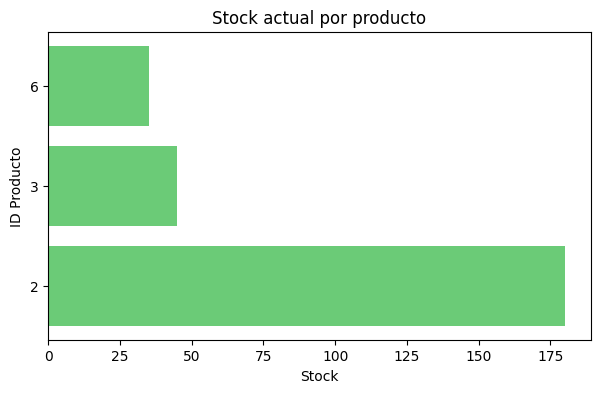

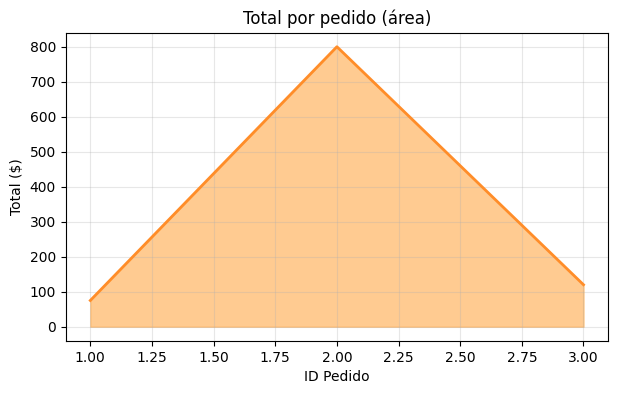

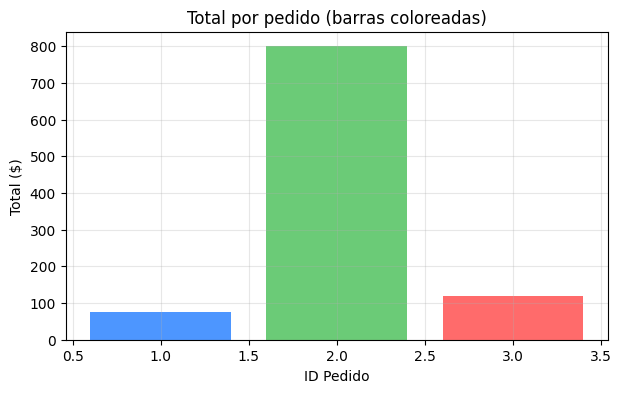

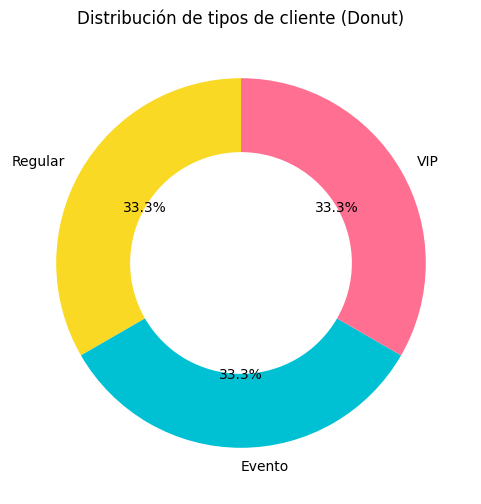


===== TABLA: EVENTO =====
   idEvento  idCliente tipoEvento fechaEvento  numeroPersonas estadoEvento
0         1          1     Piñata  2024-03-22              40   Completado
1         2          1     Posada  2025-12-15              60   Confirmado

===== TABLA: CLIENTE =====
     nombre   apellido              correo     celular TipoCliente
0   Adilene       Vega      adiv@email.com  6681853871     Regular
1   Valeria  Contreras  valeriac@email.com  6681067534      Evento
2  Fernanda     Castro      ferc@email.com  6683456231         VIP

===== TABLA: INVENTARIO =====
   idInventario  idProducto  stockActual  stockMinimo  \
0             2           2          180          100   
1             3           3           45           30   
2             6           6           35           15   

                  proveedor  
0     Tortilleria la Pasada  
1  Distribuidora Los Mochis  
2                    Varios  

===== TABLA: PEDIDO =====
   idPedido  idCliente fechaPedido    tipoPed

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

# ---------------------------
#     CARGA DE DATOS
# ---------------------------

evento_csv = """idEvento,idCliente,tipoEvento,fechaEvento,numeroPersonas,estadoEvento
1,1,Piñata,2024-03-22,40,Completado
2,1,Posada,2025-12-15,60,Confirmado
"""

cliente_csv = """nombre,apellido,correo,celular,TipoCliente
Adilene,Vega,adiv@email.com,6681853871,Regular
Valeria,Contreras,valeriac@email.com,6681067534,Evento
Fernanda,Castro,ferc@email.com,6683456231,VIP
"""

inventario_csv = """idInventario,idProducto,stockActual,stockMinimo,proveedor
2,2,180,100,Tortilleria la Pasada
3,3,45,30,Distribuidora Los Mochis
6,6,35,15,Varios
"""

pedido_csv = """idPedido,idCliente,fechaPedido,tipoPedido,estadoPedido,total,metodoPago
1,0,2024-03-20,Autoservicio,Entregado,75.00,Efectivo
2,1,2024-03-21,Evento,Completado,800.00,Transferencia
3,2,2024-03-22,Tradicional,Entregado,120.00,Tarjeta
"""

producto_csv = """idProducto,nombre,precio,categoria,disponible
1,Taco de harina,15.00,Tacos,True
2,Taco de maiz,12.00,Tacos,True
3,Horchata chica,20.00,Bebidas,True
"""

# Convertir a DataFrames
df_evento = pd.read_csv(StringIO(evento_csv))
df_cliente = pd.read_csv(StringIO(cliente_csv))
df_inventario = pd.read_csv(StringIO(inventario_csv))
df_pedido = pd.read_csv(StringIO(pedido_csv))
df_producto = pd.read_csv(StringIO(producto_csv))

print("Datos cargados correctamente.")

# ---------------------------
#    1. COLUMNAS VERTICALES
# ---------------------------
plt.figure(figsize=(7,4))
plt.bar(
    df_evento["tipoEvento"],
    df_evento["numeroPersonas"],
    color=["#FF6B6B", "#4D96FF"]
)
plt.title("Personas por evento")
plt.xlabel("Evento")
plt.ylabel("Personas")
plt.show()

# ---------------------------
#    2. GRÁFICA HORIZONTAL
# ---------------------------
plt.figure(figsize=(7,4))
plt.barh(
    df_inventario["idProducto"].astype(str),
    df_inventario["stockActual"],
    color="#6BCB77"
)
plt.title("Stock actual por producto")
plt.xlabel("Stock")
plt.ylabel("ID Producto")
plt.show()

# ---------------------------
#    3. ÁREA
# ---------------------------
plt.figure(figsize=(7,4))
plt.fill_between(
    df_pedido["idPedido"],
    df_pedido["total"],
    color="#FFB562",
    alpha=0.7
)
plt.plot(
    df_pedido["idPedido"],
    df_pedido["total"],
    color="#FF8D29",
    linewidth=2
)
plt.title("Total por pedido (área)")
plt.xlabel("ID Pedido")
plt.ylabel("Total ($)")
plt.grid(alpha=0.3)
plt.show()

# ---------------------------
#    4. BARRAS (REEMPLAZA SCATTER)
# ---------------------------
plt.figure(figsize=(7,4))
plt.bar(
    df_pedido["idPedido"],
    df_pedido["total"],
    color=["#4D96FF", "#6BCB77", "#FF6B6B"]
)
plt.title("Total por pedido (barras coloreadas)")
plt.xlabel("ID Pedido")
plt.ylabel("Total ($)")
plt.grid(alpha=0.3)
plt.show()

# ---------------------------
#    5. DONUT (TIPOS DE CLIENTE)
# ---------------------------
conteo = df_cliente["TipoCliente"].value_counts()

plt.figure(figsize=(7,6))
plt.pie(
    conteo,
    labels=conteo.index,
    autopct="%1.1f%%",
    startangle=90,
    colors=["#F9D923", "#00C1D4", "#FF6F91"],
    wedgeprops={"width":0.4}
)
plt.title("Distribución de tipos de cliente (Donut)")
plt.show()

# ---------------------------
#     MOSTRAR TABLAS FINAL
# ---------------------------

print("\n===== TABLA: EVENTO =====")
print(df_evento)

print("\n===== TABLA: CLIENTE =====")
print(df_cliente)

print("\n===== TABLA: INVENTARIO =====")
print(df_inventario)

print("\n===== TABLA: PEDIDO =====")
print(df_pedido)

print("\n===== TABLA: PRODUCTO =====")
print(df_producto)
